# **D206 - Performance Assessment**
## Kaili Hamilton

# **PRE-CLEANING**
- import preliminary libraries and packages - other packages installed as needed
- import data
- examine data types

In [193]:
import pandas as pd     #pandas for dataframes
import numpy as np      #numpy for multidimensional arrays, numerical data, 

In [194]:
import matplotlib.pyplot as plt     #for graphs
import missingno as msno     #for missing values

In [195]:
import datetime as dt     #for datetime datatypes
import seaborn as sns     #for data visualizations
import statsmodels.api as sm     #for statistics

In [196]:
#import churn_raw_data, name as df
df = pd.read_csv('churn_raw_data.csv', index_col=[0])
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


#### **Here I observe the data types and make any necessary conversions**
Converted these variables to their proper data type:
- caseorder = category
- zip = category
- children = int64
- age = int64
- item1 = category
- item2 = category
- item3 = category
- item4 = category
- item5 = category
- item6 = category
- item7 = category
- item8 = category

In [197]:
df.shape

(10000, 51)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education             10

In [199]:
#get example from row of index 1, corresponds to Case 2
df.loc[1]

CaseOrder                                                  1
Customer_id                                          K409198
Interaction             aa90260b-4141-4a24-8e36-b04ce1f4f77b
City                                             Point Baker
State                                                     AK
County                                 Prince of Wales-Hyder
Zip                                                    99927
Lat                                                   56.251
Lng                                               -133.37571
Population                                                38
Area                                                   Urban
Timezone                                       America/Sitka
Job                        Environmental health practitioner
Children                                                 NaN
Age                                                     68.0
Education                                    Master's Degree
Employment              

In [200]:
df = df.reset_index(drop=True)          #here I reset the index so we start counting at 0.
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [201]:
#Here I convert the data types with non null values. Will treat the missingness of Children and Age.
df.astype({'CaseOrder': 'int64', 
          'Zip': 'category',
          'item1': 'category',
          'item2': 'category',
          'item3': 'category',
          'item4': 'category',
          'item5': 'category',
          'item6': 'category',
          'item7': 'category',
          'item8': 'category'}).dtypes

CaseOrder                  int64
Customer_id               object
Interaction               object
City                      object
State                     object
County                    object
Zip                     category
Lat                      float64
Lng                      float64
Population                 int64
Area                      object
Timezone                  object
Job                       object
Children                 float64
Age                      float64
Education                 object
Employment                object
Income                   float64
Marital                   object
Gender                    object
Churn                     object
Outage_sec_perweek       float64
Email                      int64
Contacts                   int64
Yearly_equip_failure       int64
Techie                    object
Contract                  object
Port_modem                object
Tablet                    object
InternetService           object
Phone     

In [202]:
df.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

# **CHECK FOR DUPLICATE ROWS**
- there are no dupicate rows

In [203]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

# **DETECT & TREAT MISSING DATA**

## **Here, I will address the missingness of the variable 'Children'**
- almost 25% of the values are missing, which is too high to drop the values
- I will impute them with the median value since the distribution is skewed, rather than symetric
- then, I will convert the data type to int64

In [204]:
df['Children'].dtypes

dtype('float64')

In [205]:
df['Children'].isnull().sum() #number of missing values 2495

2495

In [206]:
df['Children'].isnull().sum() / len(df['Children'])  #percentage of missing values

0.2495

<function matplotlib.pyplot.show(close=None, block=None)>

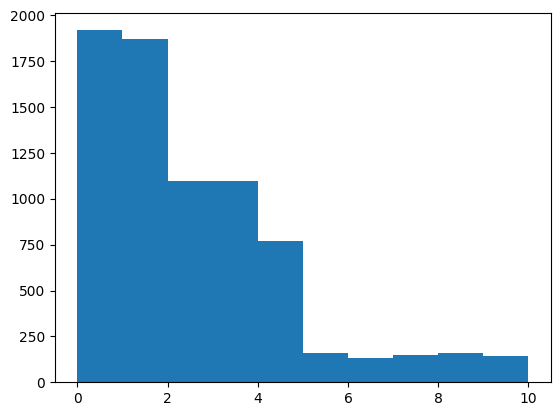

In [207]:
plt.hist(df['Children'])
plt.show
#skewed right distrubution - I will impute the median value for the missing ones

<Axes: >

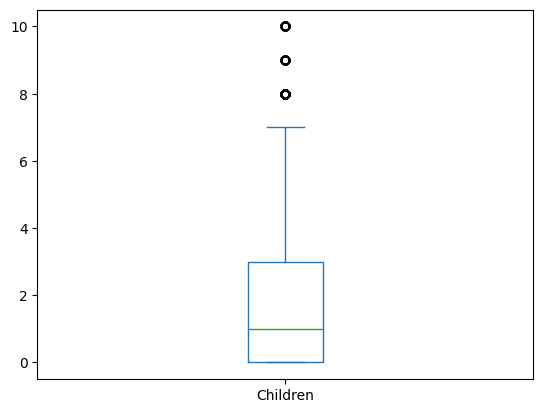

In [208]:
#are there outliers? yes
df['Children'].plot(kind='box')

In [209]:
df['Children'].median()

1.0

<Axes: >

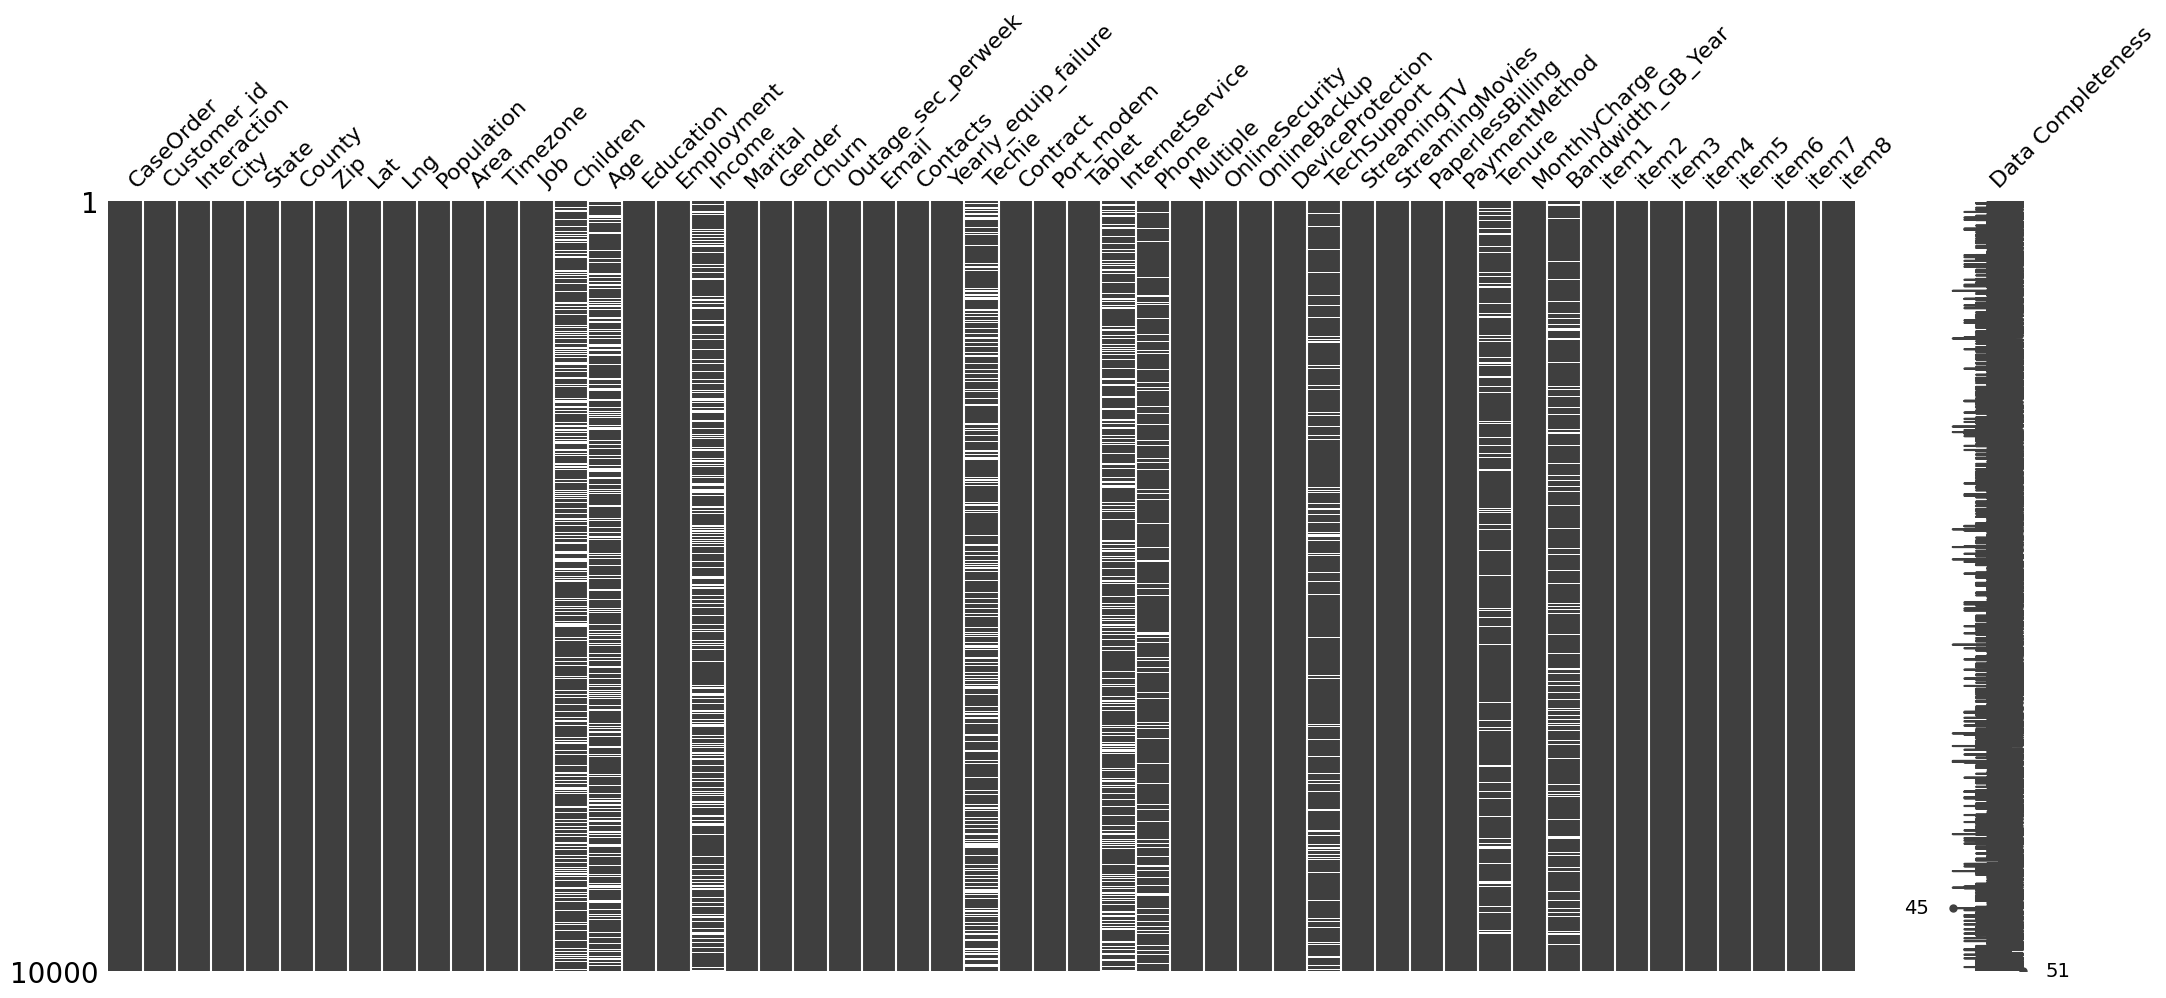

In [210]:
msno.matrix(df, labels=True)

<Axes: >

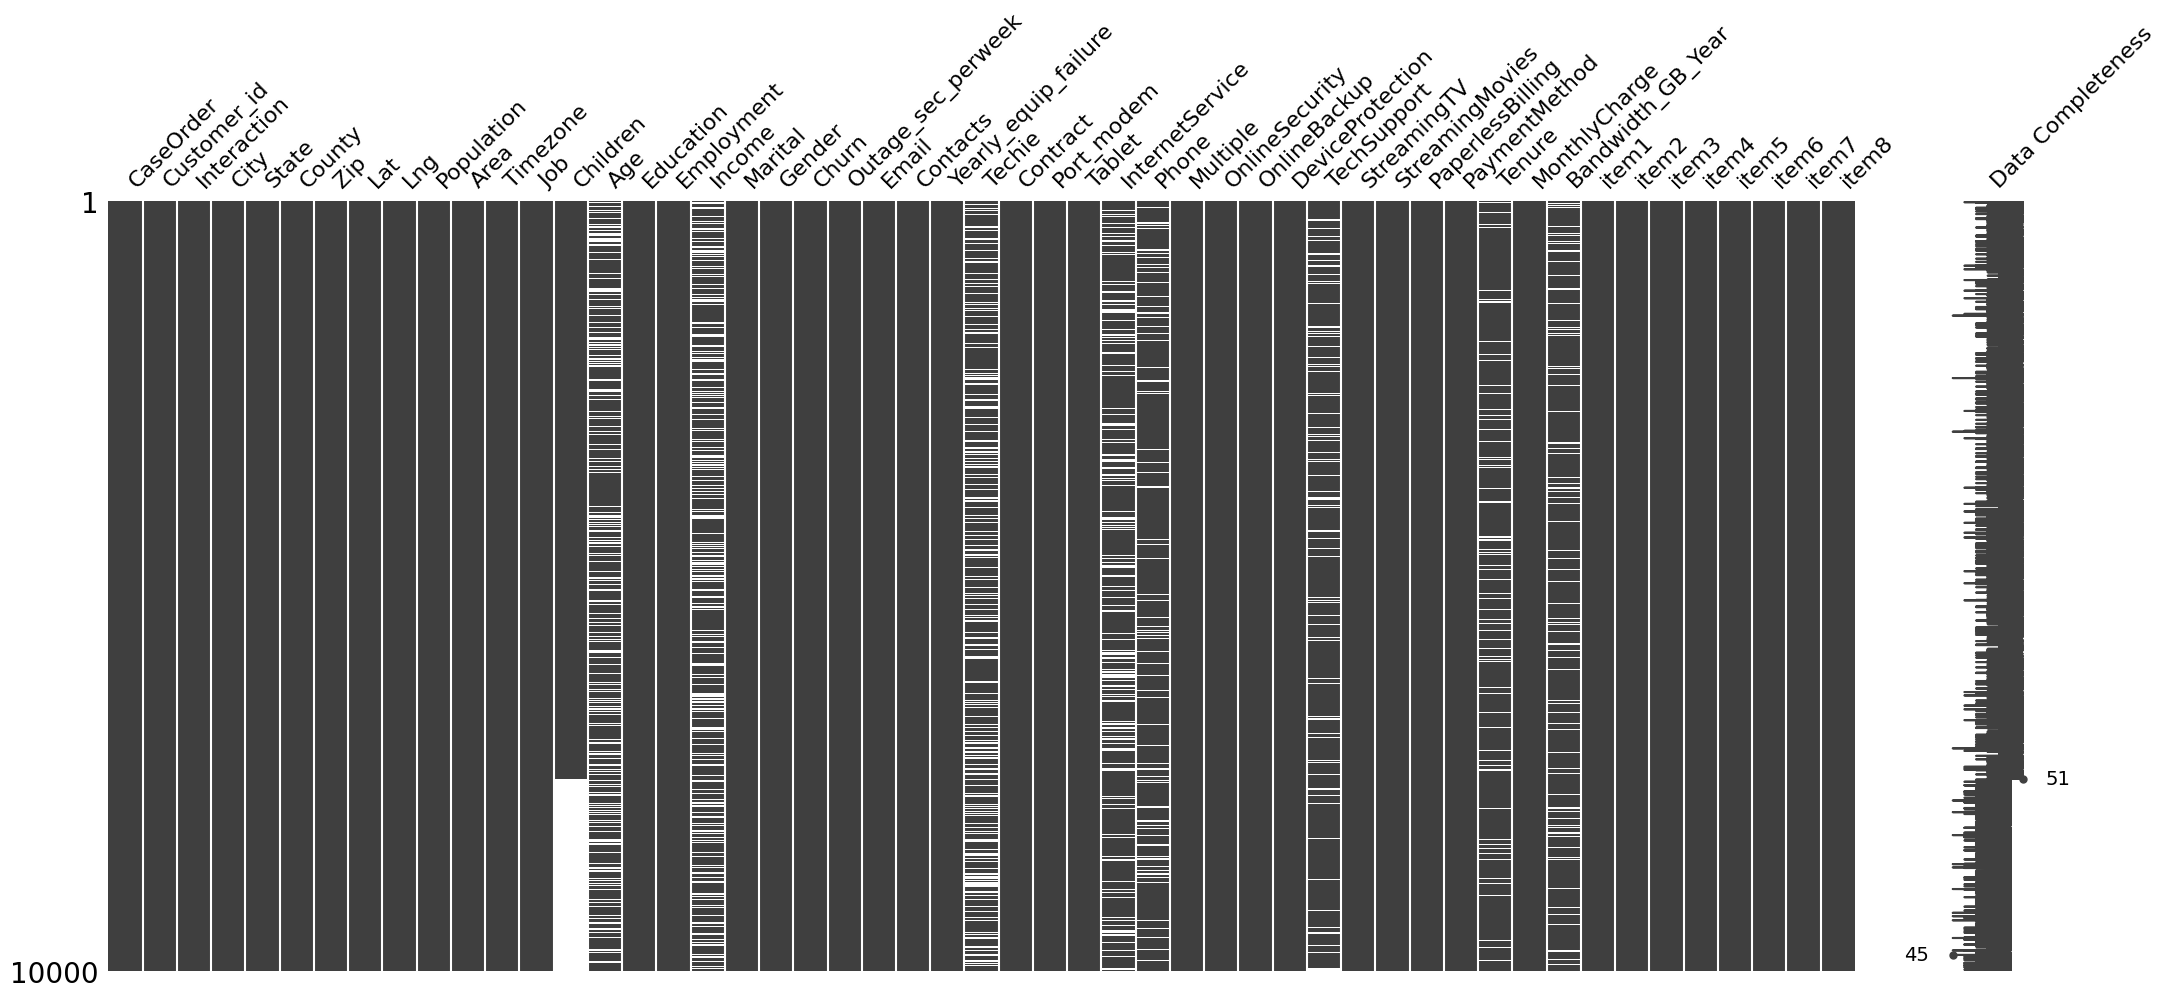

In [211]:
sorted = df.sort_values('Children')
msno.matrix(sorted, labels=True)

#the missing values for 'Children' don't seem to depend on another variable

<Axes: >

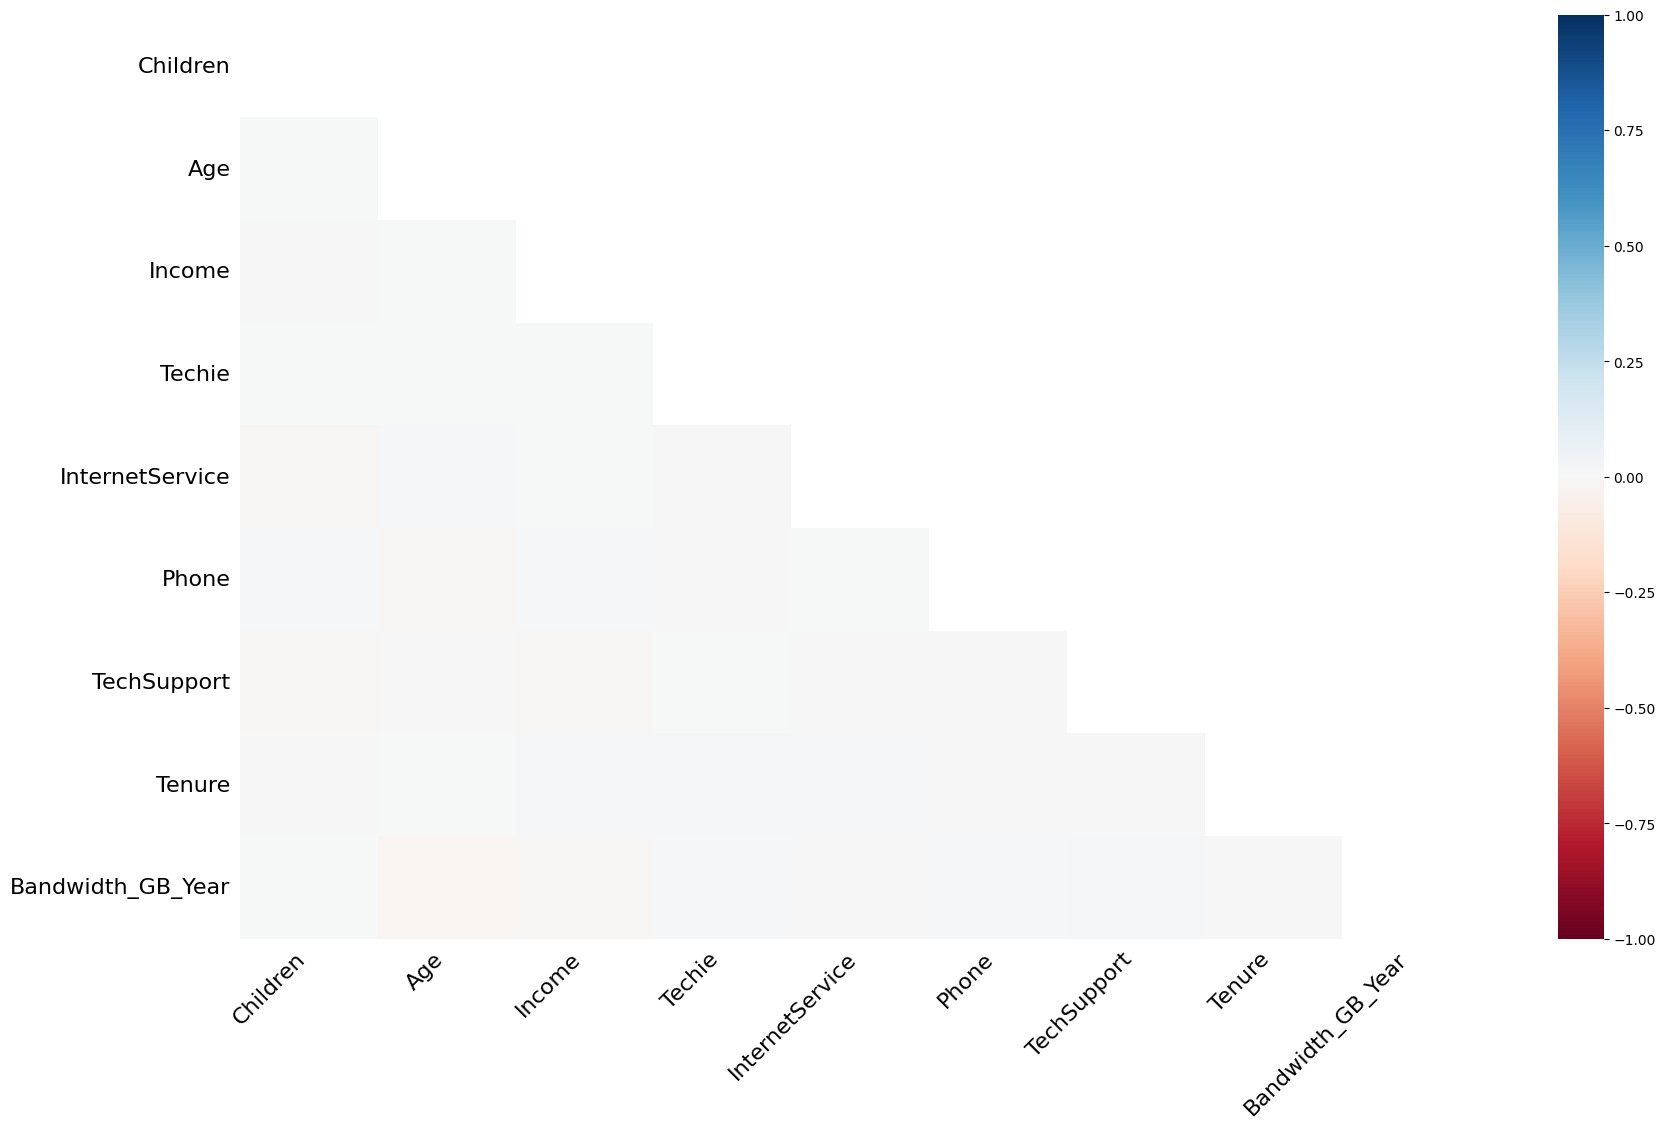

In [212]:
msno.heatmap(df)    #there doesn't appear to be any missing values that relate to another variable

In [213]:
df['Children'].loc[df['Children'].isna()]

0      NaN
9      NaN
14     NaN
15     NaN
16     NaN
        ..
9987   NaN
9989   NaN
9990   NaN
9994   NaN
9997   NaN
Name: Children, Length: 2495, dtype: float64

#### **Here I will impute the missing values of children with the median value = 1**

In [214]:
df['Children'].fillna(df['Children'].median(), inplace=True)
df.isna().sum()

#there are no missing values for children, next check if distribution is still skewed right

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

<function matplotlib.pyplot.show(close=None, block=None)>

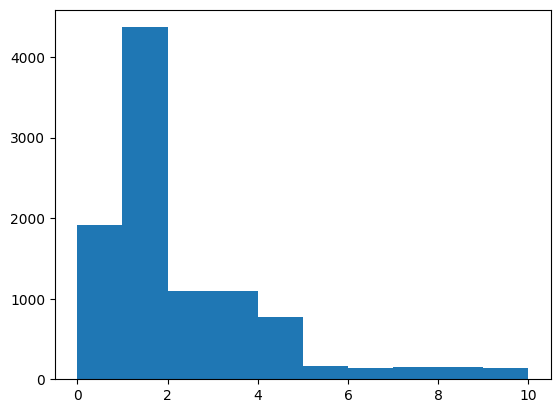

In [215]:
plt.hist(df['Children'])
plt.show

#distribution is still skewed right

<Axes: >

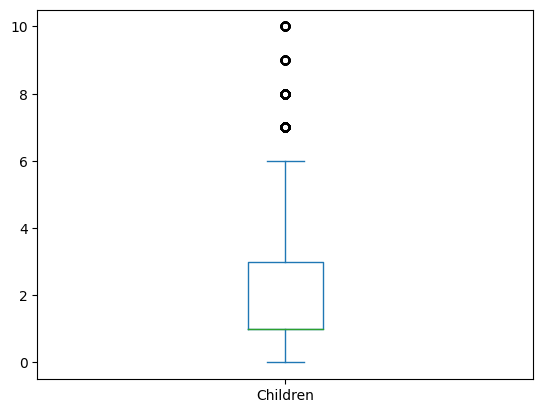

In [216]:
df['Children'].plot(kind='box')

#there is additional outlier now with the imputed values

In [217]:
# now, cast children as int64 data type
df['Children'] = df['Children'].astype('int64')

In [218]:
df['Children'].dtypes

dtype('int64')

In [219]:
#Now, 'Children' has no null values and is of datatype int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   7525 non-null   float64
 15  Education           

## **Here, I will address the missingness of 'Bandwidth_GB_Year'**

In [220]:
df['Bandwidth_GB_Year'].isnull().sum()        #1021 missing values

1021

In [221]:
df['Bandwidth_GB_Year'].isnull().sum() / len(df['Bandwidth_GB_Year'])     #10.21% of values are missing

0.1021

In [222]:
df['Bandwidth_GB_Year'].mean()

3398.842752015135

In [223]:
df['Bandwidth_GB_Year'].median()

3382.424

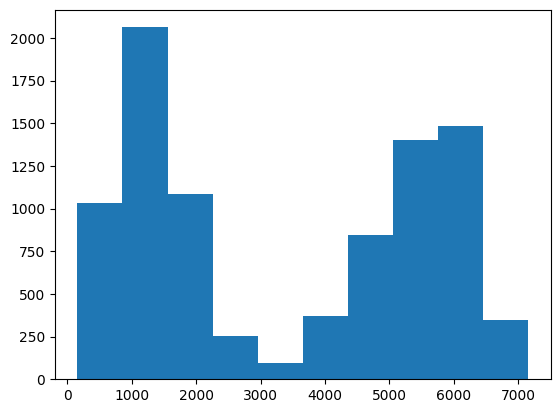

In [224]:
plt.hist(df['Bandwidth_GB_Year'])
plt.show()

#bimodal distribution - impute using median value

<Axes: >

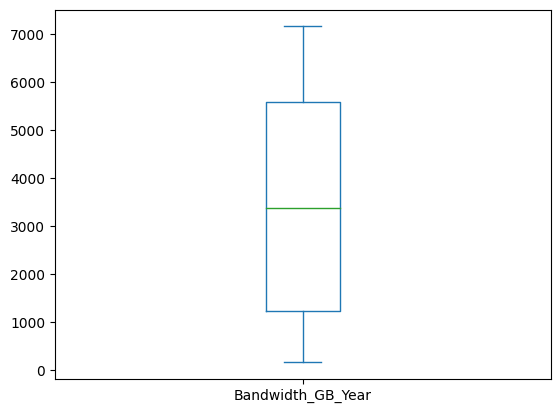

In [225]:
df['Bandwidth_GB_Year'].plot(kind='box')

#no outliers

In [226]:
df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median(), inplace=True)
df.isna().sum()

#bandwidth_GB_year now has no null values

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

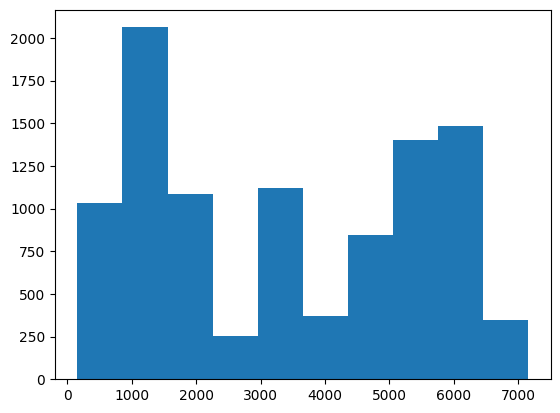

In [227]:
plt.hist(df['Bandwidth_GB_Year'])
plt.show()

#distribution is still relatively bimodal, with a spike in the middle where the median value was imputed

<Axes: >

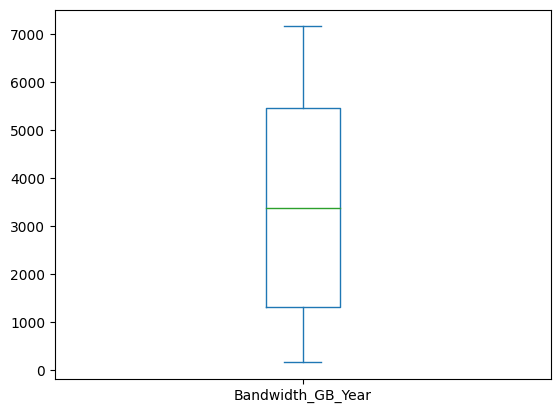

In [228]:
df['Bandwidth_GB_Year'].plot(kind='box')

#still no outliers

## Now, exploring what variable to treat for missingness next
- are data MCAR, MAR, MNAR?

<Axes: >

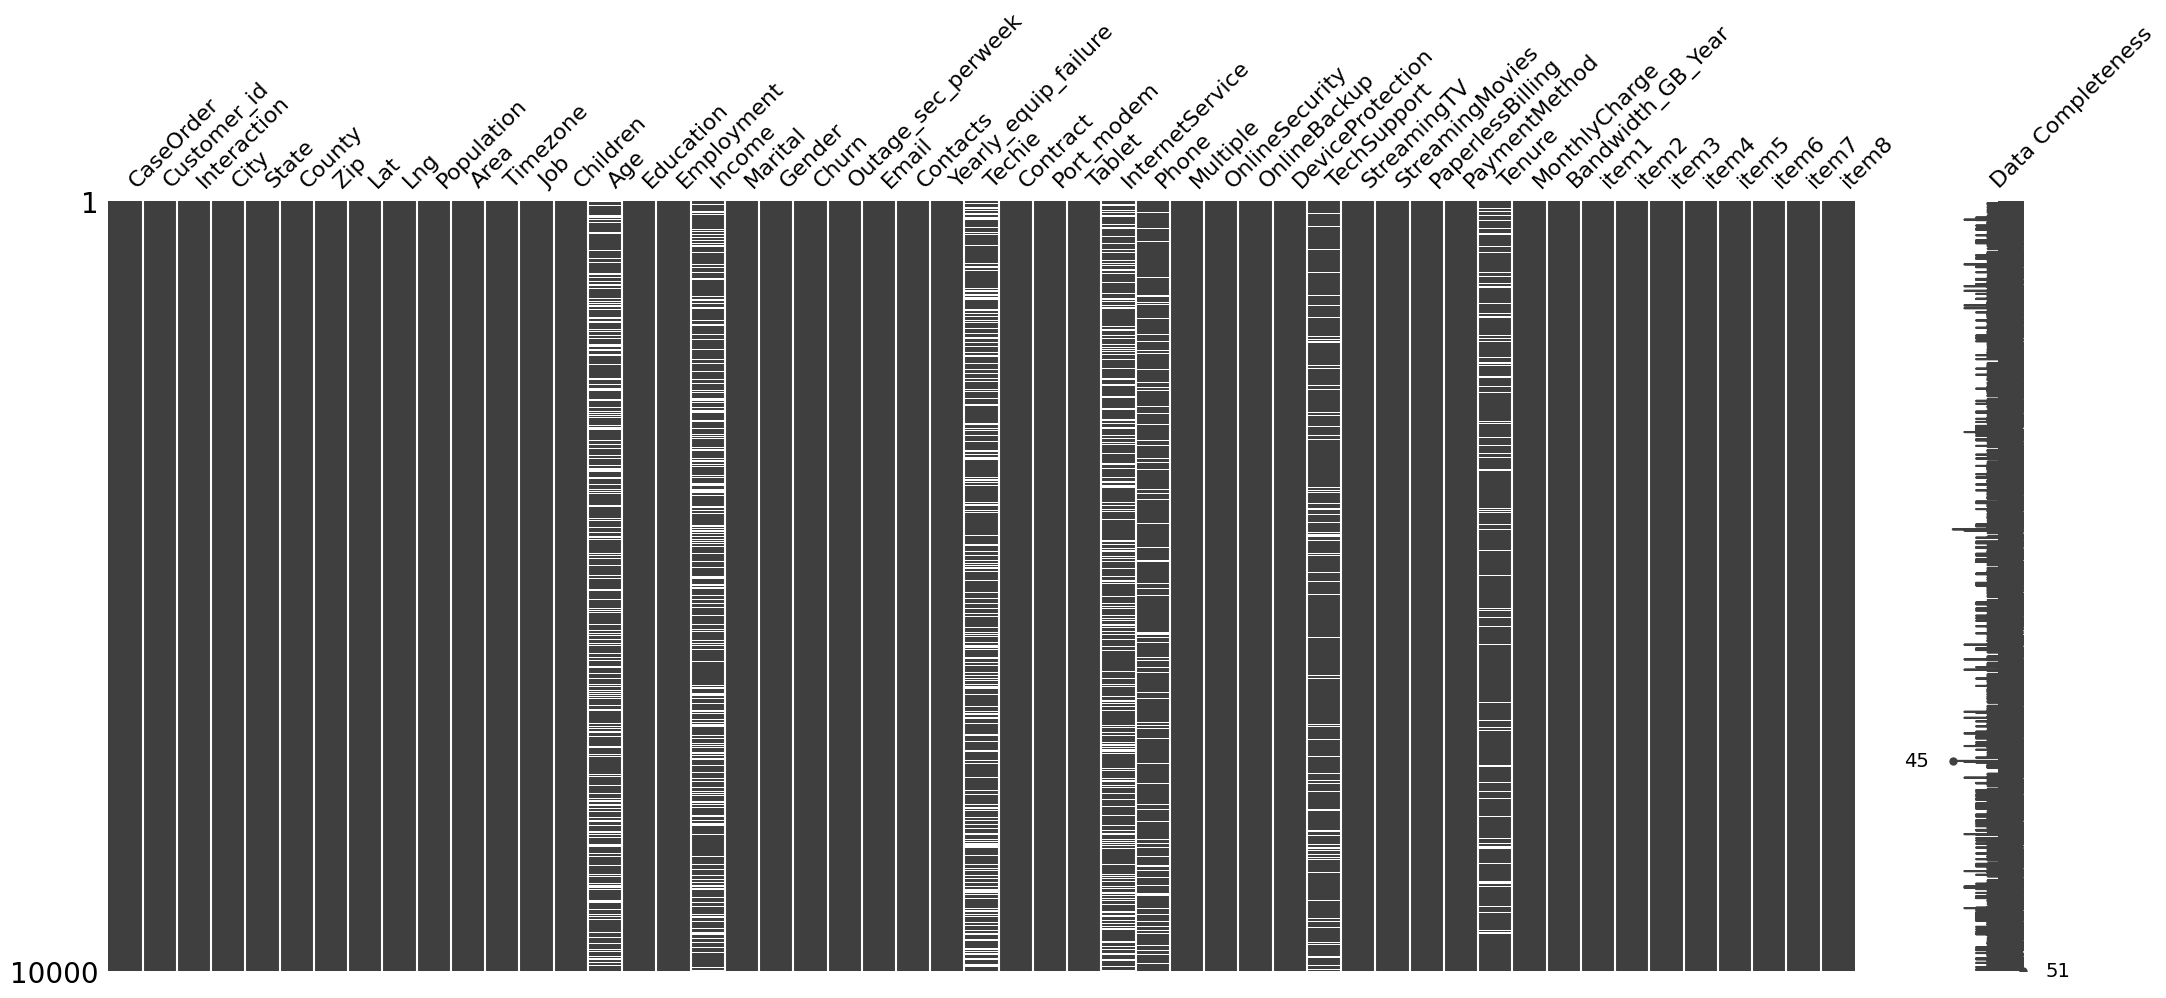

In [229]:
msno.matrix(df, labels=True)

<Axes: >

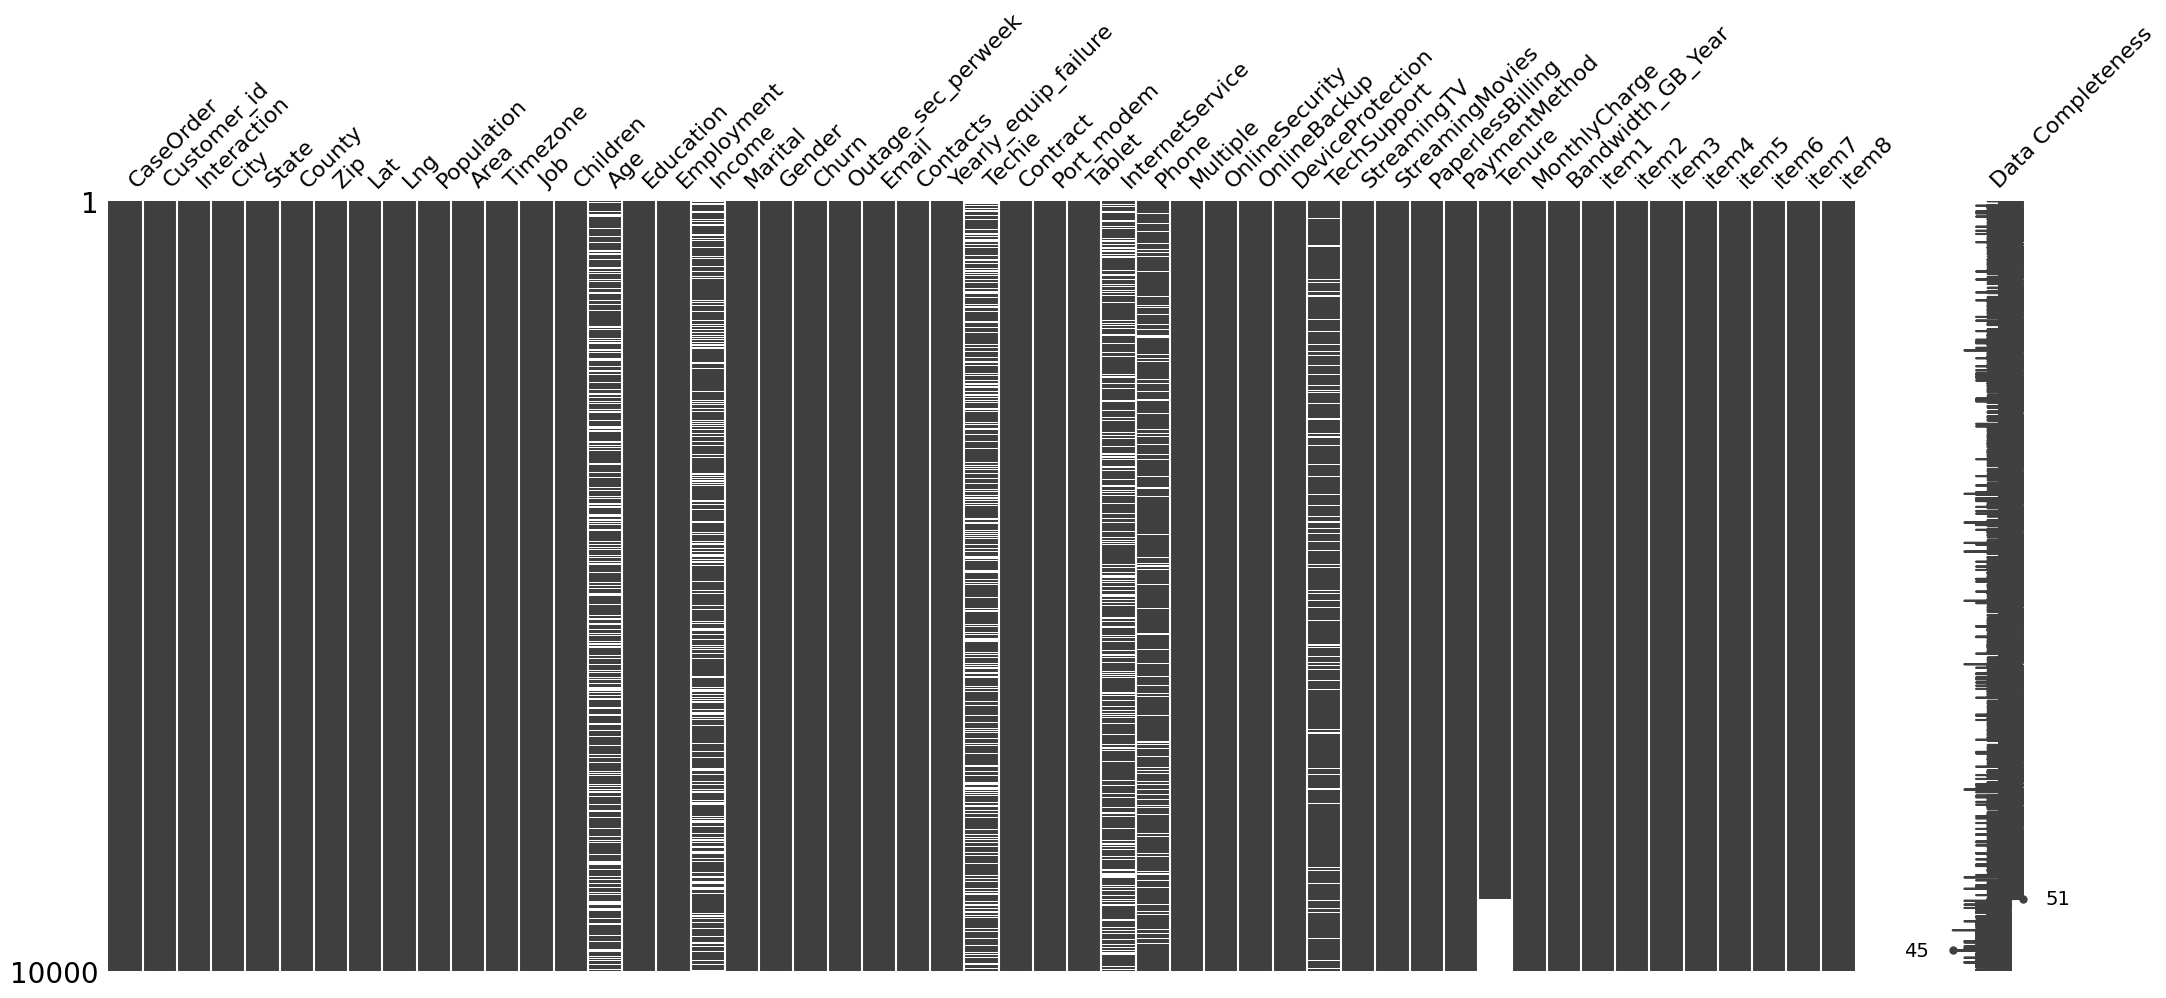

In [230]:
sorted = df.sort_values('Tenure')
msno.matrix(sorted, labels=True)

#here I sorted the msno matrix on the various missing values and no values are MNAR

<Axes: >

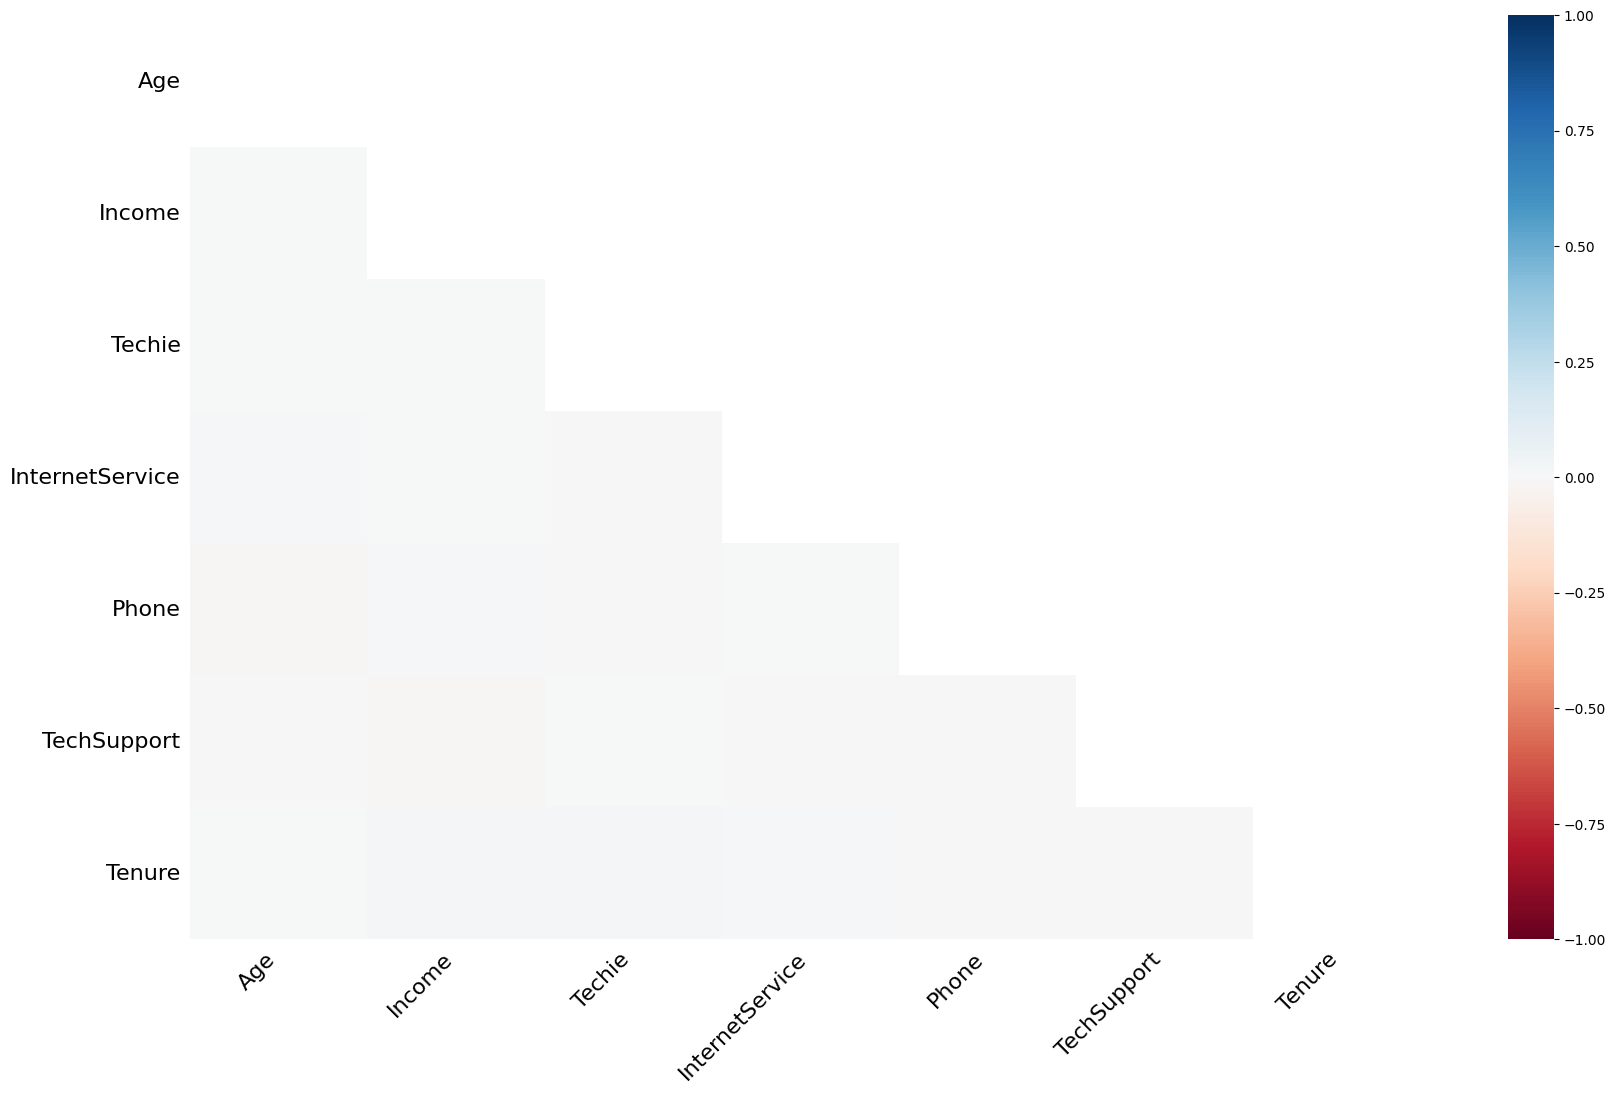

In [231]:
msno.heatmap(df)    #from the heatmap there appears to be no correlation between missing values amongst another column

<Axes: >

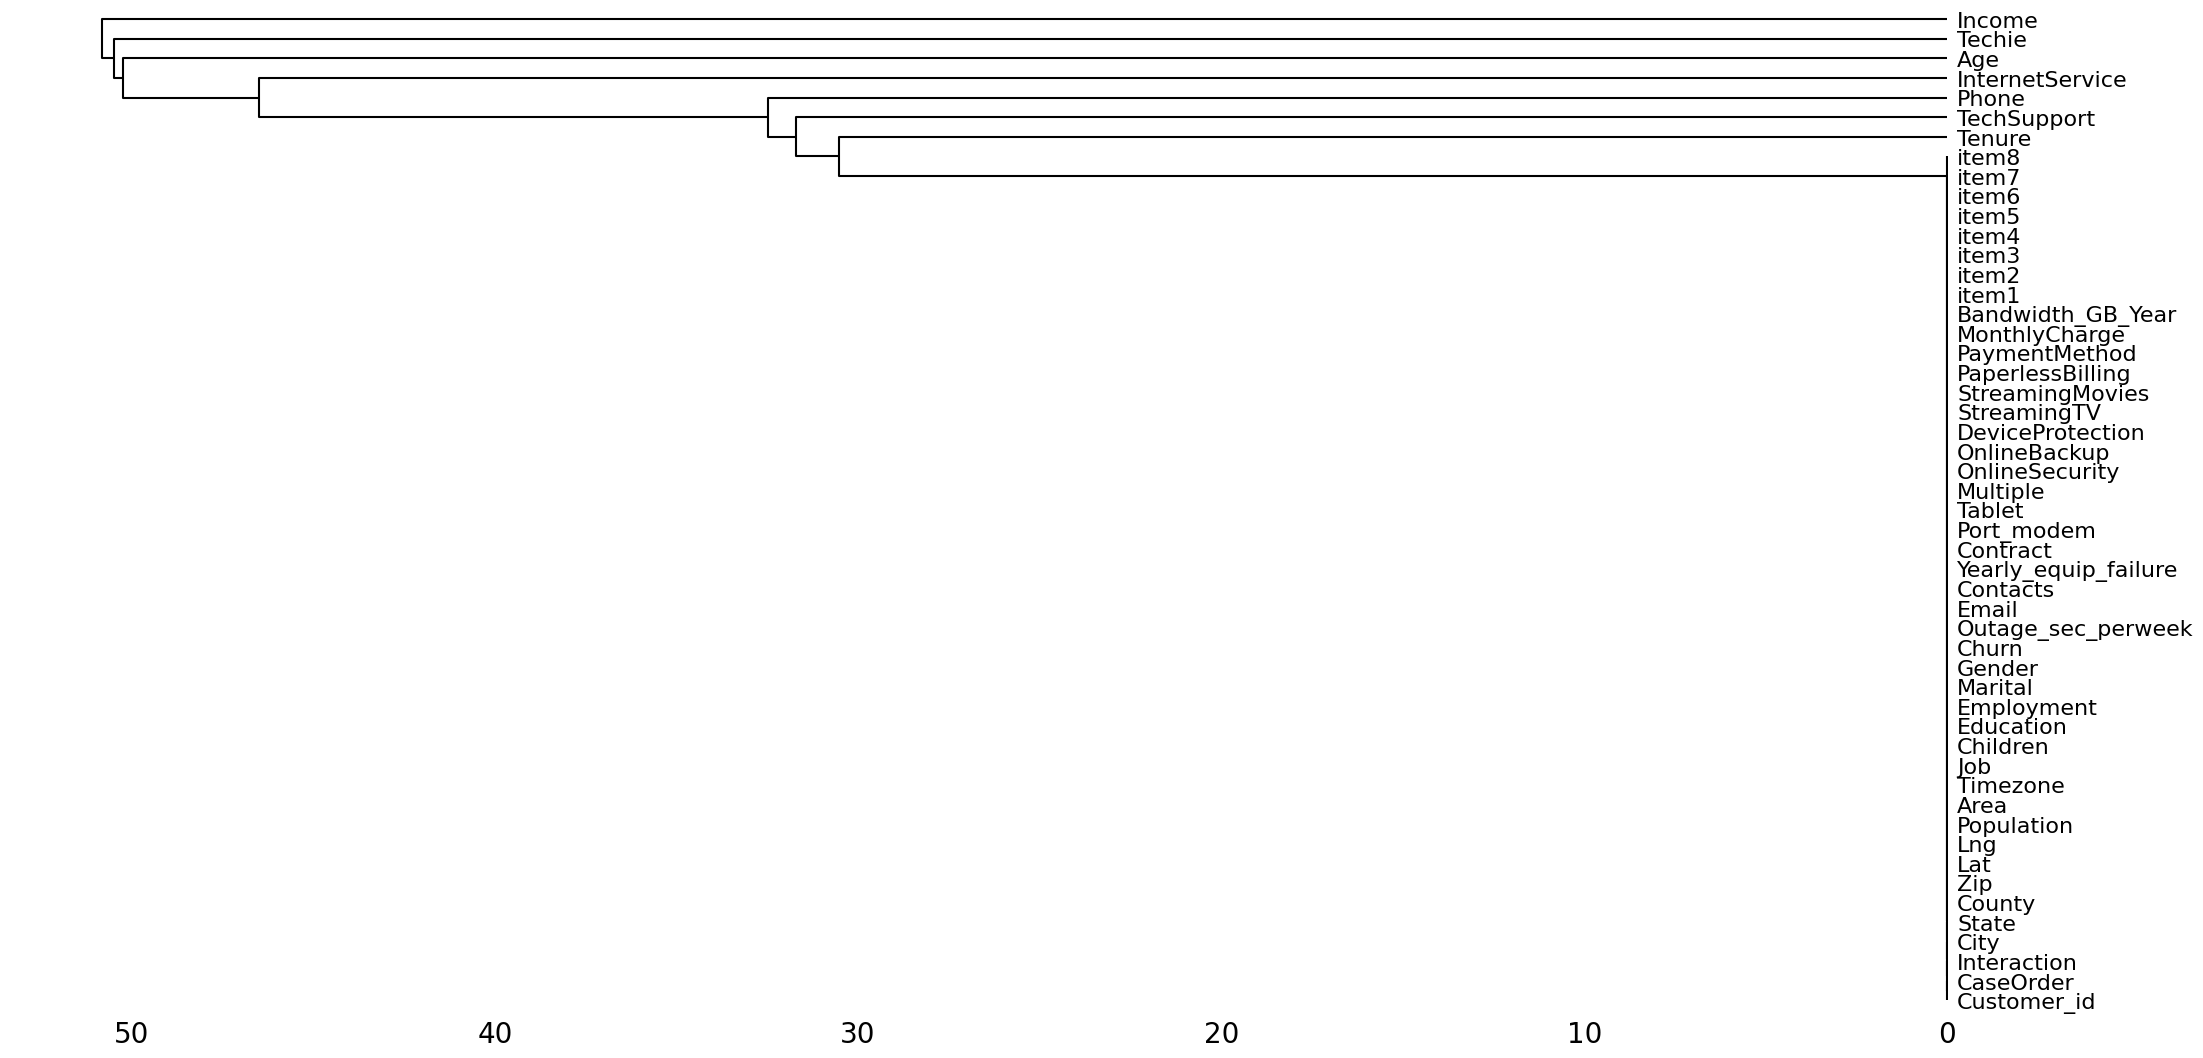

In [232]:
msno.dendrogram(df)

#will treat missingness of tenure

## **Here, I will treat the missingness of 'Tenure'**

In [233]:
df['Tenure'].isnull().sum()     #931 missing values

931

In [234]:
df['Tenure'].isnull().sum() / len(df['Tenure'])     #9.31% of values are missing

0.0931

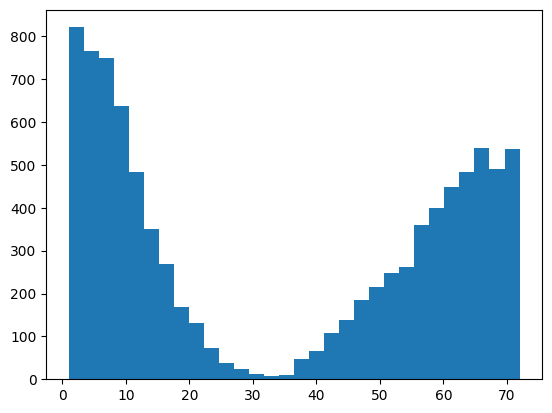

In [235]:
plt.hist(df['Tenure'], bins=30)
plt.show()

<Axes: >

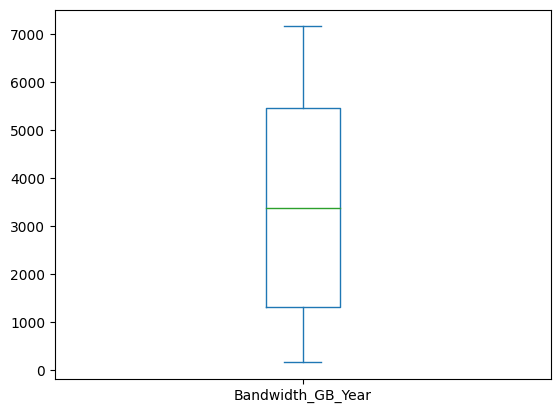

In [236]:
df['Bandwidth_GB_Year'].plot(kind='box')

In [237]:
df['Tenure'].describe()

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: Tenure, dtype: float64

In [238]:
df['Tenure'].mode(dropna=True)

0    55.44991
1    62.86571
2    66.66853
3    69.50480
Name: Tenure, dtype: float64

**The distribution of the Tenure variable is bimodal with the two modes on the extreme ends. But, when I calculate the modes, they are on the upper tail of the data. I expected the mode to be in the lower end of the data where the taller bars are. Not sure if imputing if we can/should impute with the minimum value. Imputing the median would preserve the summary statistics, but the intersting thing about this distribution is its shape, which I want to preserve. **

In [239]:
df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)       #impute with the mean

df.isna().sum()            #check to see if no missing values for Tenure

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

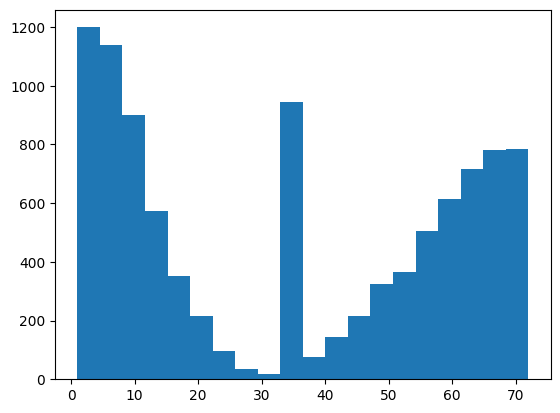

In [240]:
plt.hist(df['Tenure'], bins=20)
plt.show()


#here we see a third mode where the mean was imputed

## **Here I will treat the missingness for qualitative variables (aka categorical and object data types). I will impute using the most frequent value.**

In [241]:
df['Techie'].describe()   #'No' is the most frequently occuring value (6266 / 7523 = 83.3% of the time)

count     7523
unique       2
top         No
freq      6266
Name: Techie, dtype: object

In [242]:
df['Techie'].fillna('No', inplace=True)
df.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [243]:
df['InternetService'].describe()   #'Fiber Optic' is the most frequent,4408/7871 = 56%

count            7871
unique              2
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [244]:
df['InternetService'].fillna('Fiber Optic', inplace=True)
df.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [245]:
df['Phone'].describe()    #Yes is most frequent 8128/8974 = 90.6%

count     8974
unique       2
top        Yes
freq      8128
Name: Phone, dtype: object

In [246]:
df['Phone'].fillna('Yes', inplace=True)
df['Phone'].isna().sum()

0

In [247]:
df['TechSupport'].describe()       # No is most frequent 5635/9909 = 62.5%

count     9009
unique       2
top         No
freq      5635
Name: TechSupport, dtype: object

In [248]:
df['TechSupport'].fillna('No', inplace=True)
df['TechSupport'].isna().sum()

0

# **Now, I will treat the missingness of Age and Income with advanced imputation techniques**
these two variables have some correlation between them, older people tend to have more income

In [249]:
from sklearn.impute import KNNImputer

In [250]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [251]:
#make a copy of the df to use for knn
df_imputer_knn = df.copy(deep=True)
df_imputer_it = df.copy(deep=True)

In [252]:
knn_imp = KNNImputer(n_neighbors=3)
knn_imp.fit_transform(df[['Age', 'Income']])

array([[6.80000000e+01, 2.85619900e+04],
       [2.70000000e+01, 2.17047700e+04],
       [5.00000000e+01, 5.94427400e+04],
       ...,
       [5.32757475e+01, 3.99367622e+04],
       [3.90000000e+01, 1.66675800e+04],
       [2.80000000e+01, 1.00246100e+04]])

In [253]:
it_imp = IterativeImputer()
it_imp.fit_transform(df[['Age', 'Income']])

array([[6.80000000e+01, 2.85619900e+04],
       [2.70000000e+01, 2.17047700e+04],
       [5.00000000e+01, 3.99367619e+04],
       ...,
       [5.32757074e+01, 3.99367622e+04],
       [3.90000000e+01, 1.66675800e+04],
       [2.80000000e+01, 3.99367593e+04]])

## Iterative Imputer

In [254]:
df_imputer_it[['Age', 'Income']] = it_imp.fit_transform(df[['Age', 'Income']])

In [255]:
df_imputer_it['Age'].isna().sum()

0

In [256]:
df_imputer_it['Income'].isna().sum()

0

In [257]:
df['Age'].isna().sum()

2475

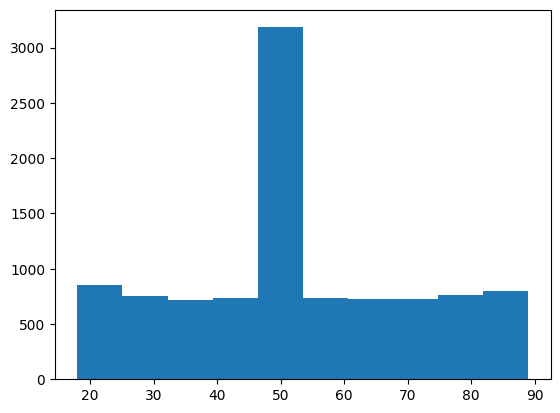

In [258]:
plt.hist(df_imputer_it['Age'])
plt.show()

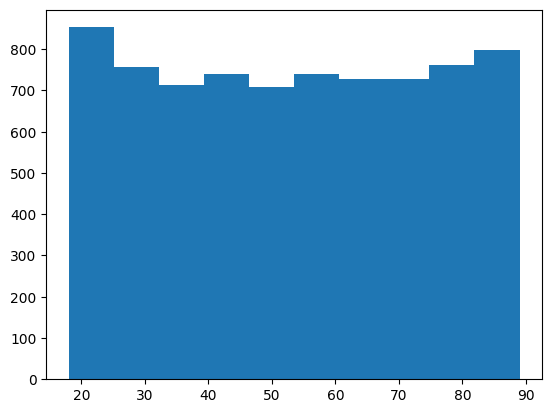

In [259]:
plt.hist(df['Age'])
plt.show()

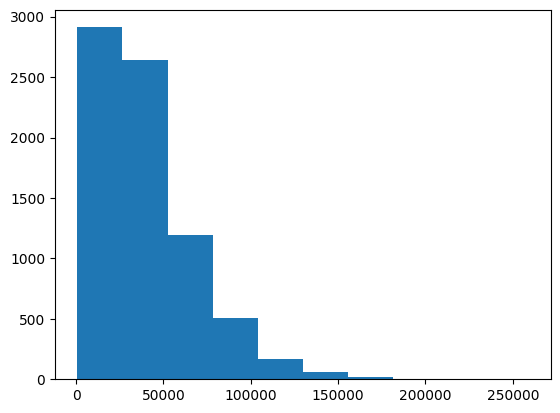

In [260]:
plt.hist(df['Income'])
plt.show()

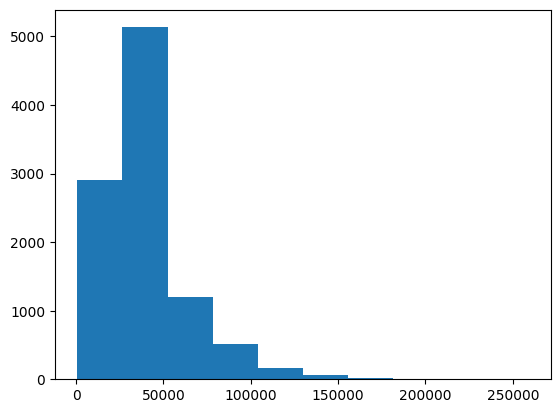

In [261]:
plt.hist(df_imputer_it['Income'])
plt.show()

## KNN

In [262]:
df_imputer_knn[['Age', 'Income']] = knn_imp.fit_transform(df[['Age', 'Income']])

In [263]:
df_imputer_knn['Age'].isna().sum()

0

In [264]:
df_imputer_knn['Income'].isna().sum()

0

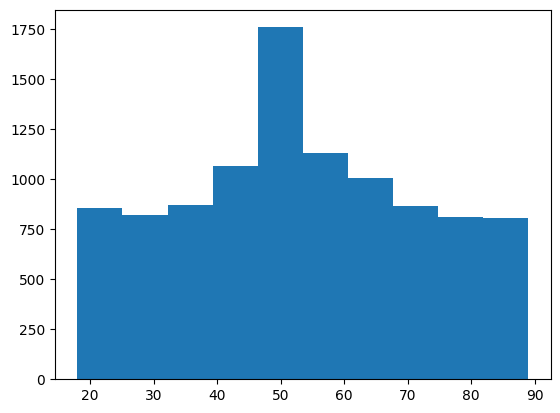

In [265]:
plt.hist(df_imputer_knn['Age'])
plt.show()

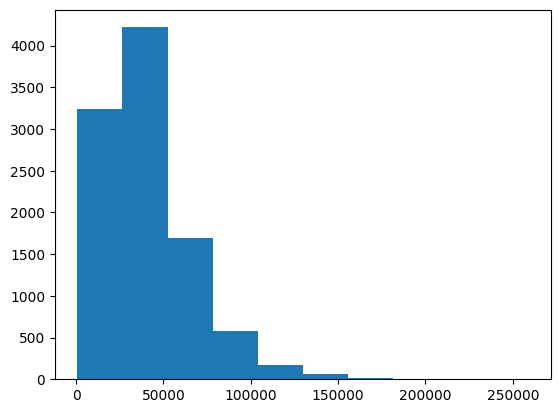

In [266]:
plt.hist(df_imputer_knn['Income'])
plt.show()

### Comparing KNN and Iterative Imputer

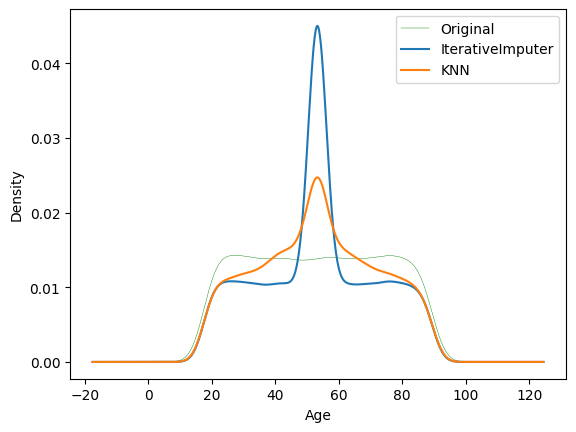

In [267]:
df['Age'].plot(kind='kde', c='green', linewidth=0.3)
df_imputer_it['Age'].plot(kind='kde')
df_imputer_knn['Age'].plot(kind='kde')

labels = ['Original', 'IterativeImputer', 'KNN']

plt.legend(labels)
plt.xlabel('Age')
plt.show()

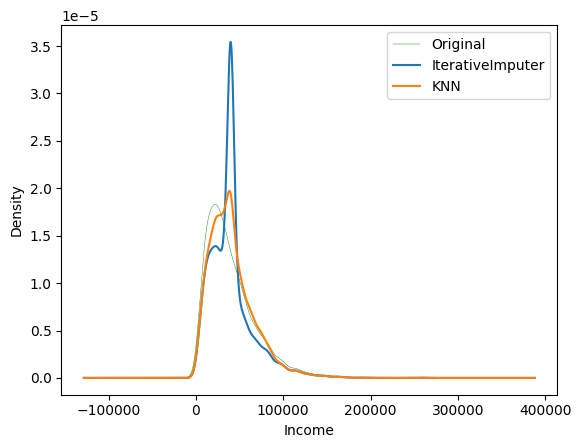

In [268]:
df['Income'].plot(kind='kde', c='green', linewidth=0.3)
df_imputer_it['Income'].plot(kind='kde')
df_imputer_knn['Income'].plot(kind='kde')

labels = ['Original', 'IterativeImputer', 'KNN']

plt.legend(labels)
plt.xlabel('Income')
plt.show()

## I will choose to impute 'Age' and 'Income' using KNN imputer because the distribution using KNN most resembles the orginal dataset for 'Age' and 'Income'.

In [269]:
df[['Age', 'Income']] = df_imputer_knn[['Age', 'Income']]

In [270]:
df['Age'].isnull().sum()

0

In [271]:
df['Income'].isnull().sum()

0

In [272]:
df.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

## **There are now no missing values.**

# **FINISH CORRECTING DATA TYPES & ROUND FLOAT TYPES**

In [273]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                  int64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple

In [274]:
#Tried to do this with a dictionary, but couldn't get it right - kept getting an error so, I did it this way:

df['CaseOrder'] = df['CaseOrder'].astype('category')
df['Zip'] = df['Zip'].astype('category')
df['Children'] = df['Children'].astype('int64')
df['Age'] = df['Age'].astype('int64')                                   
df['item1'] = df['item1'].astype('category')
df['item2'] = df['item2'].astype('category')
df['item3'] = df['item3'].astype('category')
df['item4'] = df['item4'].astype('category')
df['item5'] = df['item5'].astype('category')
df['item6'] = df['item6'].astype('category')
df['item7'] = df['item7'].astype('category')
df['item8'] = df['item8'].astype('category')

In [275]:
df.dtypes

CaseOrder               category
Customer_id               object
Interaction               object
City                      object
State                     object
County                    object
Zip                     category
Lat                      float64
Lng                      float64
Population                 int64
Area                      object
Timezone                  object
Job                       object
Children                   int64
Age                        int64
Education                 object
Employment                object
Income                   float64
Marital                   object
Gender                    object
Churn                     object
Outage_sec_perweek       float64
Email                      int64
Contacts                   int64
Yearly_equip_failure       int64
Techie                    object
Contract                  object
Port_modem                object
Tablet                    object
InternetService           object
Phone     

# **ROUND FLOAT DATA TYPES**
excluding latitude and longitude

In [276]:
df[['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']] = df[['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].round(2)

In [277]:
df['Income'].head()

0    28561.99
1    21704.77
2    59442.74
3    18925.23
4    40074.19
Name: Income, dtype: float64

# **OUTLIERS**
- determine the volume and values of outliers

### Population
- very many outliers. Will retain

<Axes: xlabel='Population'>

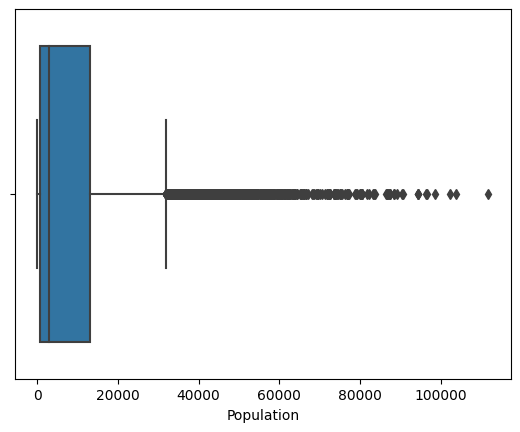

In [278]:
sns.boxplot(data=df, x=df['Population'])

### Children
- There are four outliers with the most extreme being 10 children.
- will retain the outliers

<Axes: xlabel='Children'>

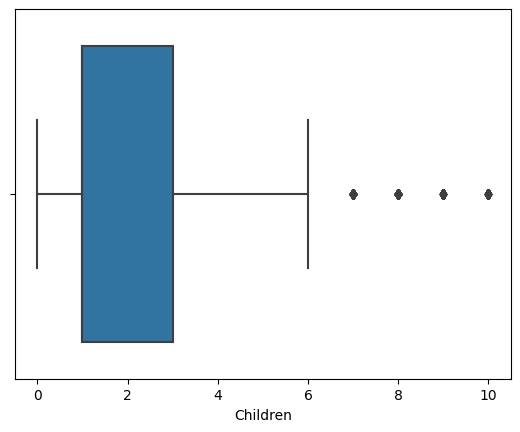

In [279]:
sns.boxplot(data=df, x=df['Children'])

### Age
- no outliers

<Axes: xlabel='Age'>

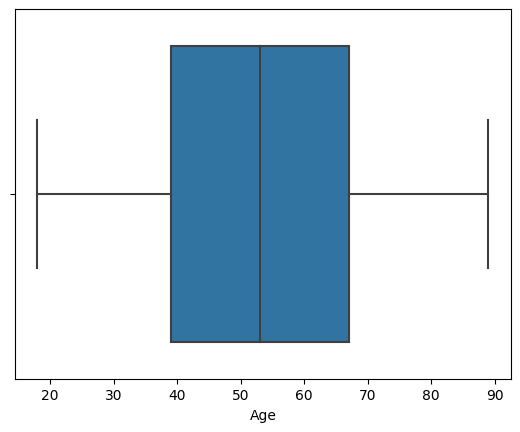

In [280]:
sns.boxplot(data=df, x=df['Age'])

### Income
- very many outliers
- two very extreme outliers, considering removing from dataset

<Axes: xlabel='Income'>

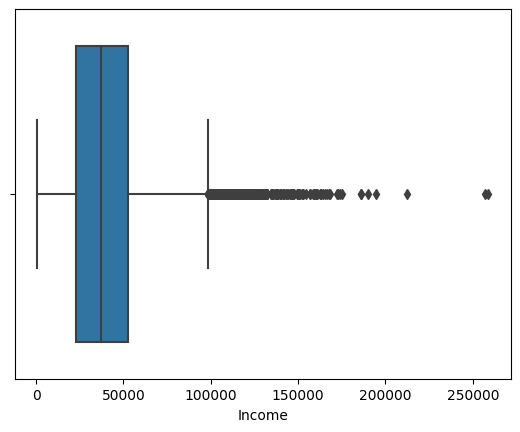

In [281]:
sns.boxplot(data=df, x=df['Income'])

### Outage_sec_perweek
- outliers on both ends of the dataset
- will retain

<Axes: xlabel='Outage_sec_perweek'>

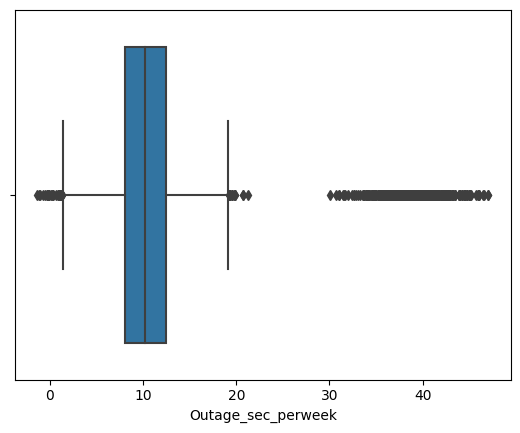

In [282]:
sns.boxplot(data=df, x=df['Outage_sec_perweek'])

### Yearly_equip_failure
- only three outliers. will retain

<Axes: xlabel='Yearly_equip_failure'>

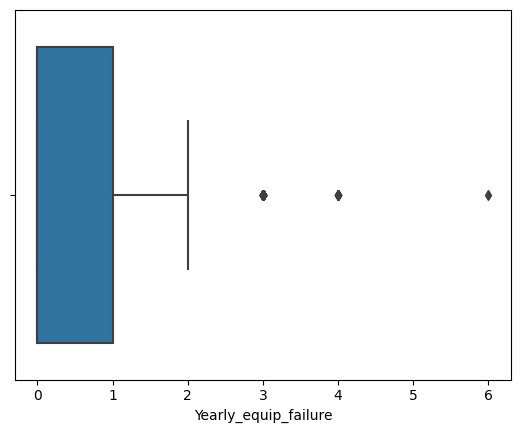

In [283]:
sns.boxplot(data=df, x=df['Yearly_equip_failure'])

### Tenure
- no outliers

<Axes: xlabel='Tenure'>

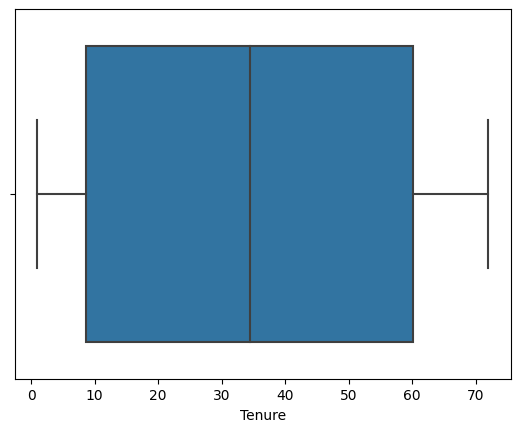

In [284]:
sns.boxplot(data=df, x=df['Tenure'])

### Monthly Charge
- very few outliers. will retain

<Axes: xlabel='MonthlyCharge'>

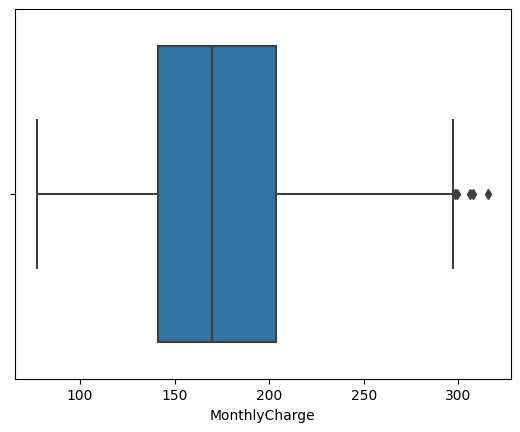

In [285]:
sns.boxplot(data=df, x=df['MonthlyCharge'])

### Bandwidth_GB_Year
- no outliers

<Axes: xlabel='Bandwidth_GB_Year'>

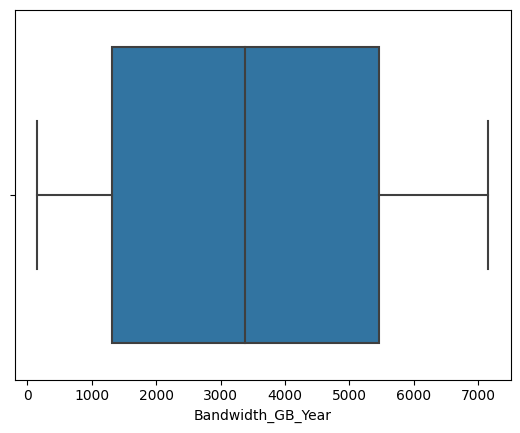

In [286]:
sns.boxplot(data=df, x=df['Bandwidth_GB_Year'])

## **OUTLIERS**
- For income I will drop rows that have incomes greater than $200,000. I believe these outliers will affect PCA
- I will leave all the outliers for the rest because I wonder if it these outliers affect churn

## **DROP OUTLIERS FOR INCOME**

<Axes: xlabel='Income'>

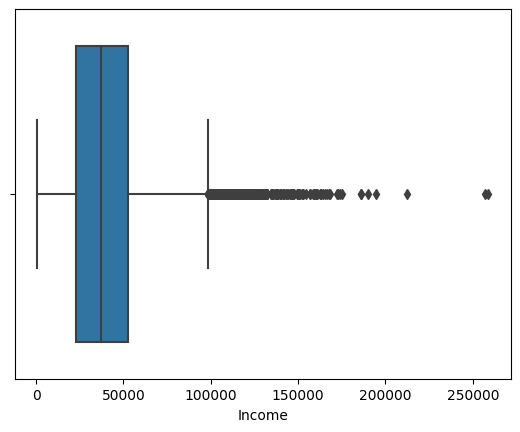

In [287]:
sns.boxplot(data=df, x=df['Income'])

In [288]:
df['Income'].max()

258900.7

In [289]:
df['Income'].nlargest(3)

4249    258900.7
9180    256998.4
5801    212255.3
Name: Income, dtype: float64

In [290]:
filt = df['Income'] > 200000
df.loc[filt]

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
4249,4250,B424726,b185ab4c-7827-4d10-b84a-d1b4e77c1aca,Tionesta,PA,Forest,16353,41.50109,-79.37700,2660,...,233.45,1296.50,4,3,4,5,3,3,5,2
5801,5802,Z110883,0e78faa9-b722-403b-9c6a-b91f2d4f78fe,Chicora,PA,Butler,16025,40.94468,-79.75638,5237,...,106.43,5080.07,3,3,3,4,4,3,4,3
9180,9181,T948793,b725c935-b5a2-4563-9d28-b9ea2d5c6798,Fredonia,WI,Ozaukee,53021,43.49465,-88.00157,5009,...,177.02,6343.94,2,3,3,3,4,3,4,3


In [291]:
# Here I created a new data frame for rows where Income is greater than or equal to $200,000, i.e., I dropped three outliers in income
df2 = df.loc[df['Income'] <= 200000]
df2.shape

(9997, 51)

# **ORDINAL ENCODING**
- Create a new dataframe, df3, from df2 (dropped outliers - Income)

In [292]:
df3 = df2
df3.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

#### **Encode all yes/no responses using ordinal encoding**
- NO = 0
- YES = 1

In [293]:
df3.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [312]:
### dict_ny = {'No' : 0, 'Yes' : 1}
df3['Churn'].replace(dict_ny, inplace=True)
df3['Churn'].value_counts()

C:\Users\kaili\AppData\Local\Temp\ipykernel_9944\2907127181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Churn'].replace(dict_ny, inplace=True)


Churn
0    7347
1    2650
Name: count, dtype: int64

In [313]:
df3['Techie'].replace(dict_ny, inplace=True)
df3['Techie'].value_counts()

C:\Users\kaili\AppData\Local\Temp\ipykernel_9944\925042125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Techie'].replace(dict_ny, inplace=True)


Techie
0    8741
1    1256
Name: count, dtype: int64

In [314]:
df3['Port_modem'].replace(dict_ny, inplace=True)


C:\Users\kaili\AppData\Local\Temp\ipykernel_9944\807949110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Port_modem'].replace(dict_ny, inplace=True)


In [315]:
df3['Tablet'].replace(dict_ny, inplace=True)
df3['Phone'].replace(dict_ny, inplace=True)
df3['Multiple'].replace(dict_ny, inplace=True)
df3['OnlineSecurity'].replace(dict_ny, inplace=True)
df3['OnlineBackup'].replace(dict_ny, inplace=True)
df3['DeviceProtection'].replace(dict_ny, inplace=True)
df3['TechSupport'].replace(dict_ny, inplace=True)
df3['StreamingTV'].replace(dict_ny, inplace=True)
df3['StreamingMovies'].replace(dict_ny, inplace=True)
df3['PaperlessBilling'].replace(dict_ny, inplace=True)

C:\Users\kaili\AppData\Local\Temp\ipykernel_9944\449437143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Tablet'].replace(dict_ny, inplace=True)
C:\Users\kaili\AppData\Local\Temp\ipykernel_9944\449437143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Phone'].replace(dict_ny, inplace=True)
C:\Users\kaili\AppData\Local\Temp\ipykernel_9944\449437143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Multiple'].r

In [316]:
#check a few values
df3[['Tablet', 'Phone', 'PaperlessBilling']]

,Tablet,Phone,PaperlessBilling
0,1,1,1
1,1,1,1
2,0,1,1
3,0,1,1
4,0,0,0
...,...,...,...
9995,1,1,0
9996,0,1,0
9997,0,1,1
9998,1,0,1


### **Other Ordinal Categorical Variables**
- will leave as is for now

In [317]:
df3['Education'].value_counts()

Education
Regular High School Diploma                 2420
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1561
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           759
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: count, dtype: int64

In [318]:
df3['Area'].value_counts()

Area
Suburban    3344
Urban       3327
Rural       3326
Name: count, dtype: int64

In [319]:
df3['Employment'].value_counts()

Employment
Full Time     5990
Part Time     1042
Retired       1010
Unemployed     991
Student        964
Name: count, dtype: int64

In [320]:
df['Contract'].value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

# **PCA**

In [302]:
from sklearn.decomposition import PCA

In [303]:
#identitfy numeric data types to perform PCA
df.dtypes

CaseOrder               category
Customer_id               object
Interaction               object
City                      object
State                     object
County                    object
Zip                     category
Lat                      float64
Lng                      float64
Population                 int64
Area                      object
Timezone                  object
Job                       object
Children                   int64
Age                        int64
Education                 object
Employment                object
Income                   float64
Marital                   object
Gender                    object
Churn                     object
Outage_sec_perweek       float64
Email                      int64
Contacts                   int64
Yearly_equip_failure       int64
Techie                    object
Contract                  object
Port_modem                object
Tablet                    object
InternetService           object
Phone     

In [304]:
#didn't include Latitude and Longitude because I am not sure if we should normalize those values since it represents a location. 
df_pca = df3[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 
                  'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

df_pca.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,1,68,28561.99,6.97,10,0,1,6.80,171.45,904.54
1,10446,1,27,21704.77,12.01,12,0,1,1.16,242.95,800.98
2,3735,4,50,59442.74,10.25,9,0,1,15.75,159.44,2054.71
3,13863,1,48,18925.23,15.21,15,2,0,17.09,120.25,2164.58
4,11352,0,83,40074.19,8.96,16,2,1,1.67,150.76,271.49


In [305]:
#normalize data
df_pca_normalized = (df_pca - df_pca.mean()) / df_pca.std()

In [306]:
#applying PCA
pca = PCA(n_components = df_pca.shape[1])
pca.fit(df_pca_normalized)

PCA(n_components=11)

In [307]:
df_pca2 = pd.DataFrame(pca.transform(df_pca_normalized), columns = ['PC1', 'PC2', 'PC3', 
                                                                    'PC4', 'PC5', 'PC6', 'PC7',
                                                                   'PC8', 'PC9', 'PC10', 'PC11'])
df_pca2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.621402,-0.399115,0.662182,0.729348,-1.126243,0.274301,-0.494806,-1.192730,0.012644,-0.378915,-0.050438
1,-1.734953,1.316877,0.780620,-1.100934,-1.084803,0.235615,0.564202,-0.507424,-0.508224,-1.350199,-0.049002
2,-0.971657,-0.221574,2.058033,0.645107,0.248091,0.462377,0.146563,-0.280851,0.094952,-0.033136,0.055320
3,-0.979840,-0.475705,-1.200068,-0.963146,-0.292157,-0.238004,-0.209286,0.883266,-0.220046,1.240662,0.132602
4,-2.024366,-0.486973,-1.628569,0.826067,-0.465618,1.179039,-1.290902,0.265319,-0.694558,0.128144,-0.067850
...,...,...,...,...,...,...,...,...,...,...,...
9992,1.979673,-0.539098,-0.317425,0.995166,0.746162,-0.584226,-0.711060,0.755505,0.418081,0.216546,0.139387
9993,1.523540,-0.080647,-2.013163,-2.151237,1.651419,2.586709,1.558612,1.034857,2.085466,-0.821776,-0.025389
9994,0.232768,-0.804540,0.426655,0.150172,-0.118659,-0.979431,0.132562,-1.140129,0.025612,-0.465581,0.274784
9995,2.132283,1.106176,-1.318786,-1.759678,0.027733,0.393577,0.854482,-0.162655,0.638200,-1.155027,-0.070236


In [308]:
#PCA loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
                        index = df_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,-0.000199,-0.056723,-0.343169,-0.293078,0.223697,0.629945,0.504105,-0.058497,0.297837,0.000965,-0.000850
Children,-0.002693,0.023920,0.559683,-0.119431,0.393495,0.125996,-0.287683,0.370870,0.529537,0.011654,-0.018623
Age,-0.001220,-0.027167,-0.344716,0.551800,0.053796,0.237854,-0.493475,-0.344666,0.364270,0.145105,0.020470
Income,0.004545,0.029488,0.111829,0.488311,0.703628,0.073413,0.222148,0.018873,-0.440865,-0.060033,0.001280
Outage_sec_perweek,0.022377,0.706629,0.020424,-0.036120,-0.010801,0.036612,0.067607,0.025171,-0.058491,0.698835,0.000421
Email,-0.020471,0.053444,-0.335694,-0.480941,0.286501,0.177305,-0.592627,0.117098,-0.413828,-0.054818,0.005780
Contacts,0.005181,-0.005274,-0.440413,0.285407,-0.113126,-0.068696,0.054470,0.835727,0.074583,0.005513,-0.002880
Yearly_equip_failure,0.015424,0.059561,0.348466,0.202423,-0.449424,0.696033,-0.105625,0.146936,-0.314526,-0.125251,-0.002323
Tenure,0.705048,-0.057973,-0.013850,-0.006311,0.006172,-0.000008,-0.016631,-0.009461,-0.013201,0.037488,-0.705216
MonthlyCharge,0.045984,0.696700,-0.094489,0.038692,0.004215,-0.057720,0.007160,-0.073156,0.156423,-0.683029,-0.048177


In [309]:
#selecting PCs
cov_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

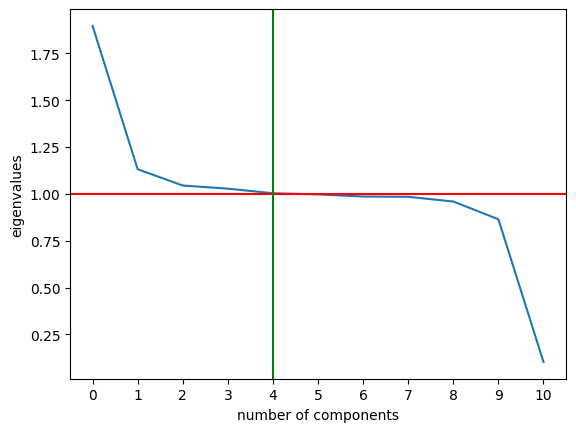

In [310]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color = 'red')
plt.axvline(x=4, color = 'green')
plt.xticks(np.arange(0, 11, step=1))
plt.show()

# **EXPORT CLEAN DATA**

In [311]:
df3.to_csv('churn_clean_data.csv', index=False)